Analyse the mapping of OpenAlex subjects to those of the repositories

In [1]:
import json
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
subjects = json.load(open('../data/openalex/repo_mapping.json'))
len(subjects)  # no. of mapped subjects

1272

In [3]:
lengths = [len(v['docs']) for v in subjects.values()]
sum(lengths) / len(lengths)  # avg. no. of documents per subject

7.116352201257862

In [4]:
sum(lengths)  # total number of assignments

9052

In [5]:
sorted_lengths = sorted(lengths, reverse=True)
top = sorted_lengths[:5]  # no. of docs of the five subjects with the most docs
for subject in subjects:
  if len(subjects[subject]['docs']) in top:
    print(subject, len(subjects[subject]['docs']))

spectroscopy 70
sustainability 124
climate change 154
molecular dynamics 76
mass spectrometry 87


In [6]:
cnt = Counter(lengths)
print(cnt.most_common(5))  # most common no. of documents per subject

[(1, 301), (2, 196), (3, 140), (4, 98), (5, 85)]


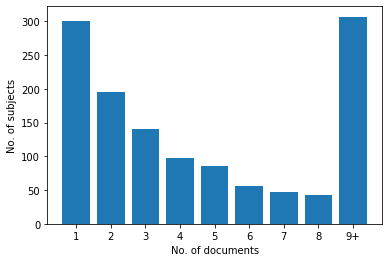

In [7]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [cnt[i] for i in range(1, 9)] + [sum(cnt[i] for i in cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of documents')
plt.ylabel('No. of subjects')
plt.xticks(range(1, 10), x)
plt.show()

In [8]:
y

[301, 196, 140, 98, 85, 56, 47, 42, 307]

Now that we have seen some basic facts about the mapping, let's classify them by field.

In [9]:
openalex = json.load(open('../data/openalex/subjects.json'))
fields = [s['name'] for s in openalex.values() if s['level'] == 0]
subject_cnt = {name: len(v['docs']) for name, v in subjects.items()}
distribution = {f: 0 for f in fields}
for subject in subjects:
  ancestors = openalex[subjects[subject]['openalex_id']]['ancestors']
  for ancestor in ancestors:
    if ancestor['level'] == 0:
      distribution[ancestor['display_name']] += 1
distribution
  

{'Medicine': 230,
 'Chemistry': 193,
 'Biology': 322,
 'Computer science': 145,
 'Materials science': 142,
 'Engineering': 150,
 'Psychology': 159,
 'Physics': 220,
 'Political science': 184,
 'Mathematics': 128,
 'Business': 64,
 'Sociology': 82,
 'Geography': 130,
 'Art': 51,
 'Environmental science': 41,
 'Economics': 143,
 'Geology': 127,
 'History': 85,
 'Philosophy': 112}

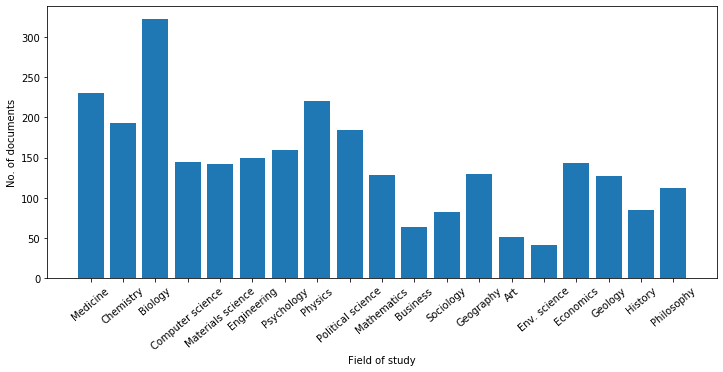

In [10]:
x = list(distribution.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(distribution)), distribution.values())
plt.xticks(range(len(distribution)), x, rotation=40)
plt.xlabel('Field of study')
plt.ylabel('No. of documents')
plt.show()

In [22]:
total = sum(distribution.values())
for key, cnt in distribution.items():
  print(key, cnt/total)

Medicine 0.08493353028064993
Chemistry 0.07127031019202364
Biology 0.1189069423929099
Computer science 0.053545051698670604
Materials science 0.05243722304283604
Engineering 0.055391432791728215
Psychology 0.058714918759231904
Physics 0.08124076809453472
Political science 0.06794682422451995
Mathematics 0.047267355982274745
Business 0.023633677991137372
Sociology 0.030280649926144758
Geography 0.048005908419497784
Art 0.01883308714918759
Environmental science 0.015140324963072379
Economics 0.052806499261447565
Geology 0.04689807976366322
History 0.03138847858197932
Philosophy 0.0413589364844904


That is very nice. We have assignments that belong to all fields, and in many cases more than 100 (all but Business, Sociology, Art, Env. science and History). For Medicine, Biology and Physics we have more than 200 assignments.

Now let's see how many subjects each document has.

In [11]:
docs = {}
for subject in subjects:
  for doc in subjects[subject]['docs']:
    if doc in docs:
      docs[doc].append(subject)
    else:
      docs[doc] = [subject]
len(docs)  # no. of documents

7145

In [12]:
doc_cnt = Counter([len(v) for v in docs.values()])
doc_cnt.most_common(5)  # 5 most common number of subjects per document

[(1, 5575), (2, 1292), (3, 234), (4, 36), (5, 5)]

In [13]:
sum([k*v for k,v in doc_cnt.items()]) / sum(doc_cnt.values())  # avg. number of subjects per document

1.2668999300209938

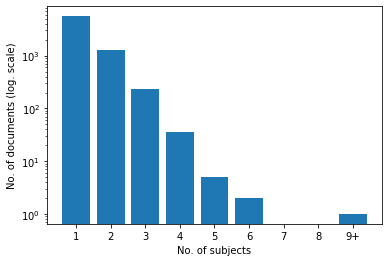

In [14]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [doc_cnt[i] for i in range(1, 9)] + [sum(doc_cnt[i] for i in doc_cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents (log. scale)')
plt.yscale('log')
plt.xticks(range(1, 10), x)
plt.show()

In [15]:
sorted_docs = sorted([len(v) for v in docs.values()], reverse=True)
top = sorted_docs[:5]  # no. of subjects of the five docs with the most subjects
for doc in docs:
  if len(docs[doc]) in top:
    print(doc, len(docs[doc]), docs[doc])

oai:edoc.hu-berlin.de:18452/19245 5 ['sustainability', 'climate change', 'land use', 'nitrogen', 'livestock']
oai:edoc.hu-berlin.de:18452/3836 5 ['sustainability', 'climate change', 'renewable energy', 'solar energy', 'rural development']
oai:edoc.hu-berlin.de:18452/17163 10 ['sustainability', 'sustainable development', 'human rights', 'poverty', 'social responsibility', 'capacity building', 'autonomy', 'social change', 'hospitality', 'social work']
oai:edoc.hu-berlin.de:18452/3857 5 ['climate change', 'business model', 'irrigation', 'livestock', 'crop production']
oai:edoc.hu-berlin.de:18452/3820 5 ['sustainable development', 'tourism', 'community development', 'ecotourism', 'crop production']
oai:refubium.fu-berlin.de:fub188/10504 6 ['magnesium', 'ammonia', 'potassium', 'urea', 'chloride', 'sodium']
oai:refubium.fu-berlin.de:fub188/1998 5 ['semiotics', 'philosophy', 'cognition', 'law', 'sociology']
oai:refubium.fu-berlin.de:fub188/17172 6 ['law', 'legislation', 'legislation', 'consti

What is the distribution of the documents across repositories?

In [16]:
repo_cnt = {'depositonce': 0, 'edoc': 0, 'refubium': 0}
for doc in docs:
  for repo in repo_cnt:
    if repo in doc:
      repo_cnt[repo] += 1
      break
repo_cnt

{'depositonce': 2192, 'edoc': 1745, 'refubium': 3208}

In [17]:
repo_totals = {'depositonce': 7438, 'edoc': 7497, 'refubium': 14464}  # total no. of docs
for repo in repo_totals:
  print(repo, repo_cnt[repo]/repo_totals[repo])

depositonce 0.2947028771175047
edoc 0.23275977057489664
refubium 0.2217920353982301


In [20]:
sum(repo_cnt.values()), sum(repo_cnt.values()) / sum(repo_totals.values())

(7145, 0.2430354773971904)